In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
import matplotlib.pyplot as plt
import datetime
import io
from PIL import Image
from IPython.display import Image as IPyImage
import imageio

In [2]:
#load data
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


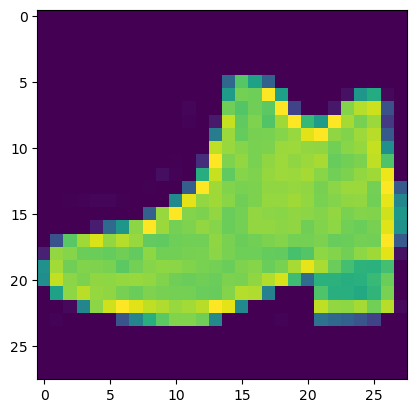

In [3]:
index=15   # Pick a random image to display

np.set_printoptions(linewidth=320)
#print(f'LABEL:{train_labels[index]}')
#print(f'\nIMAGE PIXEL ARRAY:\n{train_images[index]}')
#plt.imshow(train_images[index],cmap='Greys')  # show greyscales
plt.imshow(train_images[index])                # show color map

In [4]:
#Normalize Data
train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
# Visualization utilities
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))
GIF_PATH = 'd:/data/logs/animation.gif'

def display_digits(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])
    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)
    
    
class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=5, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples

    def on_epoch_end(self, epoch, logs=None):
        # Randomly sample data
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        predictions = np.argmax(self.model.predict(X_test), axis=1)

        # Plot the digits
        display_digits(X_test, predictions, y_test, epoch, n=self.n_samples)

        # Save the figure
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))

        # Display the digits every 'display_freq' number of epochs
        if epoch % self.display_freq == 0:
            plt.show()

    def on_train_end(self, logs=None):
        imageio.mimsave(GIF_PATH, self.images, fps=1)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8286


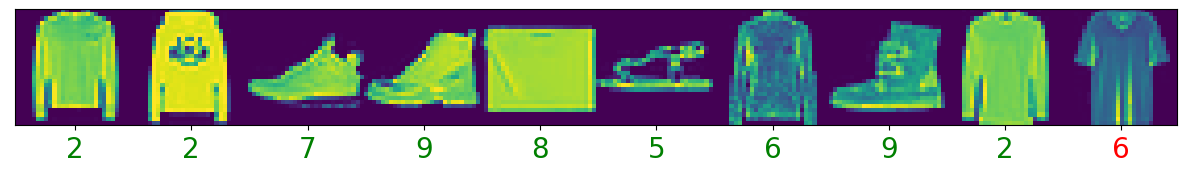

Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3621 - accuracy: 0.8680
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8806
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3028 - accuracy: 0.8888
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.8937
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8986


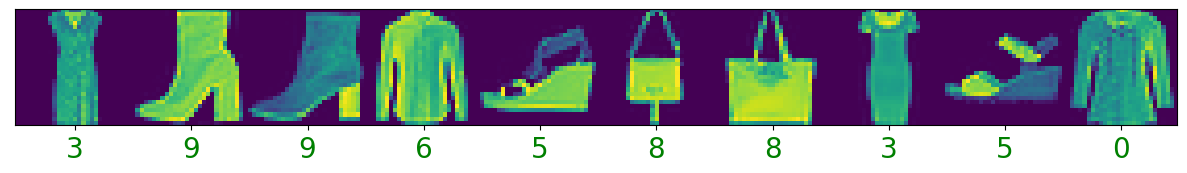

Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2580 - accuracy: 0.9042
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2455 - accuracy: 0.9083
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2356 - accuracy: 0.9115
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2255 - accuracy: 0.9146
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9173


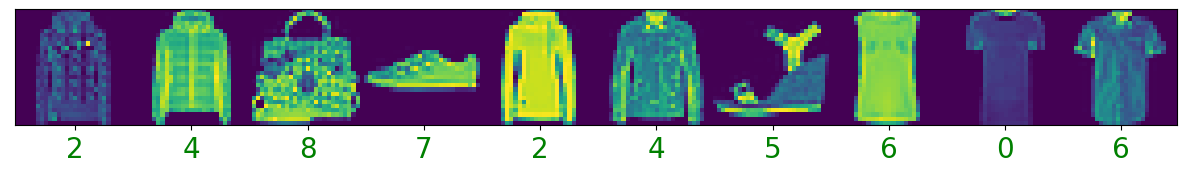

Epoch 12/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2100 - accuracy: 0.9207
Epoch 13/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2041 - accuracy: 0.9233
Epoch 14/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1967 - accuracy: 0.9252
Epoch 15/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1903 - accuracy: 0.9288
Epoch 16/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1845 - accuracy: 0.9305


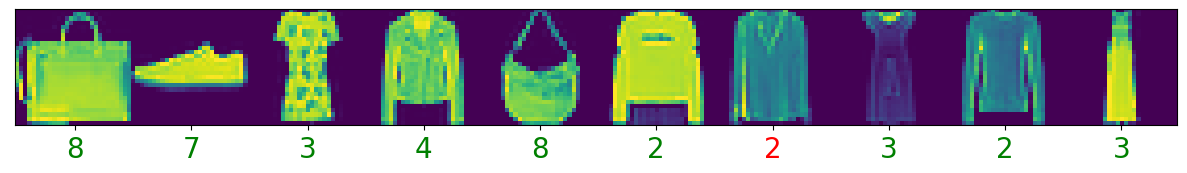

Epoch 17/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1807 - accuracy: 0.9326
Epoch 18/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1721 - accuracy: 0.9354
Epoch 19/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1709 - accuracy: 0.9343
Epoch 20/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1643 - accuracy: 0.9377


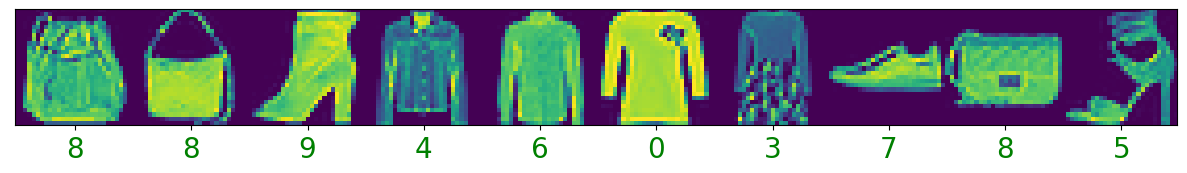

In [11]:
#Build model and train
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])


model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels, callbacks=[VisCallback(train_images, train_labels)], epochs=20)


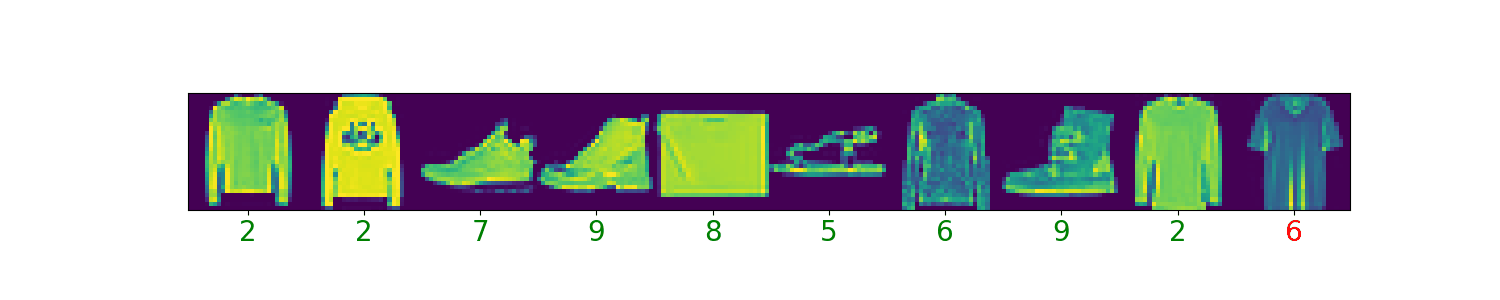

In [12]:
SCALE = 60

# FYI, the format is set to PNG here to bypass checks for acceptable embeddings
IPyImage(GIF_PATH, format='png', width=15 * SCALE, height=3 * SCALE) 

In [14]:
model.evaluate(test_images, test_labels) # See how we do against our validation set

313/313 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8952


[0.3366858959197998, 0.8952000141143799]

In [23]:
classifications = model.predict(test_images)

print('output:',classifications[1])
print('prediction : ',np.argmax(classifications[1]))
print('first label: ',test_labels[1])


output: [9.8612183e-04 1.8263354e-17 9.9879372e-01 7.2957135e-13 1.9264079e-04 8.3062327e-16 2.7484830e-05 1.0343261e-13 2.6687704e-14 6.8082647e-18]
prediction :  2
first label:  2


In [ ]:
#Demo only
inputs=np.array([[1.0,3.0, 4.0, 2.0]])  # create a random weigted probability input
inputs=tf.convert_to_tensor(inputs)  # convert it to a tensorflow object
print('inputs: ',inputs,'\n')        # show it's now a tensor
outputs=tf.keras.activations.softmax(inputs)  # Feed it into softmax just for visibility
sum=tf.reduce_sum(outputs)   
print('outputs: ',outputs)              # Output is now a tensor
print('sum:',sum)                       # Since it's softmax it sums to 1
prediction=np.argmax(outputs)           # Prediction is 2 because np.array[2] was the max value
print('prediction:',prediction,'\n\n')  # Prediction is 2 because np.array[2] was the max value